In [1]:
import numpy as np
import pandas as pd
import warnings
from keras.preprocessing import image
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from skimage import img_as_ubyte
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_fscore_support as prfs
from skimage.io import imread
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

In [2]:
testPath = './AugTest/'
trainPath = './AugTrain/'
imgSize = 100

In [3]:
def scale(im):
    return cv2.resize(im, (imgSize,imgSize))

In [6]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    print("Total Manufacturers:",len(categories))

    descr = "A Logo classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    y = []
    for i, direc in enumerate(folders):
        count = 0
        if i==100:
            break
        for file in direc.iterdir():
            count += 1
            img = imread(file, cv2.COLOR_BGR2GRAY)
            img_pred = scale(img)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            img_pred = img_pred.squeeze()
            train_img.append(img_pred)
            y.append(i)

    X = np.array(train_img)
    y = np.asarray(y, dtype=np.int16)

    return [X,y,categories]

In [7]:
X_test,y_test,_ = load_image_files(testPath)
X_train,y_train,logos = load_image_files(trainPath)

Total Manufacturers: 18
Total Manufacturers: 18


0 (100, 100)


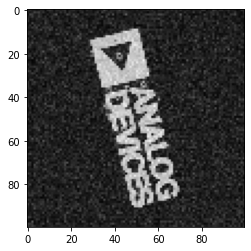

In [8]:
plt.figure()
plt.imshow(X_train[2],  cmap='gray')
print(y_train[2],X_train[2].shape)

X_train: (3834, 100, 100)
X_test: (3073, 100, 100)
y_train: (3834,)
y_test: (3073,)
0 (100, 100)
X_train: (3834, 10000)
X_test: (3073, 10000)
y_train: (3834,)
y_test: (3073,)


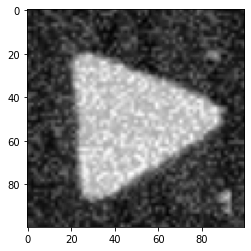

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, stratify=y_test)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
# print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
# print("y_val: "+str(y_val.shape))

plt.figure()
plt.imshow(X_train[123],  cmap='gray')
print(y_train[0],X_train[0].shape)
# print(y_train)

# Reshape the image data into rows
# X_full = np.reshape(X, (X.shape[0], 10000))
X_train = np.reshape(X_train, (X_train.shape[0], 10000))
X_test = np.reshape(X_test, (X_test.shape[0], 10000))
# X_val = np.reshape(X_val, (X_val.shape[0], 10000))

# print("X: "+str(X.shape))
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
# print("X_val: "+str(X_val.shape))
# print("y: "+str(y.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
# print("y_val: "+str(y_val.shape))

In [10]:
def SIFTmetric(src,target):
#     print(src,target)
    src,target=np.reshape(src,(100,100)),np.reshape(target,(100,100))
    src = cv.normalize(src, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
    target = cv.normalize(target, None, 0, 255, cv.NORM_MINMAX).astype('uint8')
    keyps, desc = sift.detectAndCompute(src,None)
    keyps_t, desc_t = sift.detectAndCompute(target,None)
#     fig= plt.figure()
#     fig= plt.figure()

#     print("Template share",src.shape)
#     print("Target share",target.shape)
# #     show first image
#     ax = fig.add_subplot(1, 3, 1)
#     ax.set_title("src")
#     plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

#     # show the second image
#     ax = fig.add_subplot(1, 3, 2)
#     ax.set_title("Target")
#     plt.imshow(cv.cvtColor(target, cv.COLOR_BGR2RGB))
    
    img_p = cv.drawKeypoints(target,keyps_t,np.array([]))
    
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(desc,desc_t)
    matches = sorted(matches, key = lambda x:x.distance)
#     print("Features:\n"+"Matched :",len(matches),"Template :",len(desc),"Target :",len(desc_t))
    comp = cv.drawMatches(src, keyps, img_p, keyps_t, matches, img_p, flags=2)
#     ax = fig.add_subplot(1,3,3)
#     ax.set_title("Matches")
#     plt.imshow(comp)
#     if matches:
    m=len(matches)/min(len(desc),len(desc_t))
#     print("MATCH:",m,"\n") 
    return m
#     return 0



In [11]:
def getImg(file):
    originalImage = np.array(Image.open(file))
    grayImage = cv.GaussianBlur(cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY),(5,5),0)
    (thresh, blackAndWhiteImage) = cv.threshold(grayImage, 127, 255, cv.THRESH_BINARY)
    print(blackAndWhiteImage.shape)
    blackAndWhiteImage=scale(blackAndWhiteImage)
    plt.figure()
    plt.imshow(cv.cvtColor(grayImage, cv.COLOR_BGR2RGB))
    return blackAndWhiteImage.reshape(10000)

In [17]:
from sklearn.model_selection import cross_val_score
print("Using SKLEARN")
lix = []
liy_tr = []
liy_t = []
score=[]
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
for k in range(1,30):
#     print("at",k)
    neigh = RandomForestClassifier(n_estimators=k)
    neigh.fit(X_train, y_train)
    liy_tr.append(neigh.score(X_train, y_train))
    liy_t.append(neigh.score(X_test, +y_test))
    
#     print(liy_v)
    if liy_t[k-1]>acc:
        acc=liy_t[k-1]
        index=k-1
    lix.append(k)


Using SKLEARN


In [18]:
print("Max accuracy at k={} accuracy of {:.2%}".format(index,acc))


Max accuracy at k=27 accuracy of 59.81%


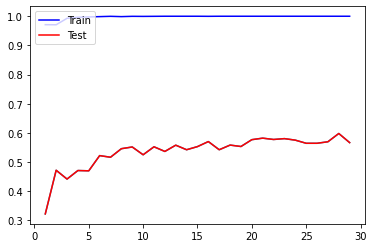

27


In [19]:
plt.plot(lix, liy_t)
# plt.legend("Validation","Test")
plt.plot(lix, liy_tr , "-b", label="Train")
plt.plot(lix, liy_t, "-r", label="Test")
# plt.plot(lix, liy_tr, "-g", label="Train")
plt.legend(loc="upper left")
plt.show()
print(liy_t.index(max(liy_t)))

In [22]:
from sklearn.ensemble import RandomForestClassifier
final = RandomForestClassifier(n_estimators=index  )
final.fit(X_train, y_train)
print("Train Accuracy: "+str(final.score(X_train, y_train)))
print("Test Accuracy: "+str(final.score(X_test, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.5645948584445167


Analog Devices [0] [[0.44444444 0.         0.         0.         0.03703704 0.
  0.         0.         0.         0.         0.         0.44444444
  0.03703704 0.         0.         0.         0.03703704 0.        ]]


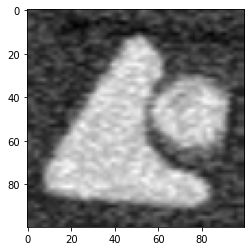

In [23]:
# print(X_val[99].shape)
prediction = final.predict(X_test[12].reshape(1, -1))
prediction_mul = final.predict_proba(X_test[12].reshape(1, -1))
print(logos[int(prediction)],prediction,prediction_mul)
plt.figure()
plt.imshow(X_test[12].reshape(100, 100), cmap='gray')


In [27]:
Y_pred = final.predict(X_test)
precision, recall, f1, support = prfs(y_test, Y_pred, average='weighted')
print("Precision: {:.2%}\nRecall: {:.2%}\nF1 score: {:.2%}\nAccuracy: {:.2%}".format(precision, recall, f1, final.score(X_test, y_test)))

Precision: 56.89%
Recall: 56.46%
F1 score: 51.31%
Accuracy: 56.46%


In [28]:
# timg=getImg('an.png')
# prediction = final.predict(timg.reshape(1, -1))
# prediction_mul = final.predict_proba(timg.reshape(1, -1))
# print(categories[int(prediction)])
# plt.figure()
# plt.imshow(timg.reshape(100, 100), cmap='gray')
# # print(prediction_mul.argsort()[-2:][::-1])

FileNotFoundError: [Errno 2] No such file or directory: 'an.png'

In [32]:
print(logos,len(logos))

['Analog Devices', 'Bel fuse inc', 'Fairchild Semiconductor', 'General Semiconductors Industries Inc', 'Level One', 'Linear Technologies', 'Micron Technologies', 'Mitsubishi Electric Corporation', 'Motorola Semiconductor Products Inc', 'Nvidia', 'ON Semiconductors', 'Pericom Semiconductors', 'Pulse-a Technitrol Co', 'Recongized Component Mark', 'Samsung Electronics', 'STMicroelectronics', 'Texas Instruments Inc', 'Xilinx'] 18
